In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df = pd.concat([df, df_test], axis=0, sort=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
for i in df.columns:
    if i == 'PassengerId' or i == 'Name' or i == 'Age' or i == 'Ticket' or i == 'Fare':
        continue
    print(i)
    print(df[i].unique())

Survived
[ 0.  1. nan]
Pclass
[3 1 2]
Sex
['male' 'female']
SibSp
[1 0 3 4 2 5 8]
Parch
[0 1 2 5 3 4 6 9]
Cabin
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' '

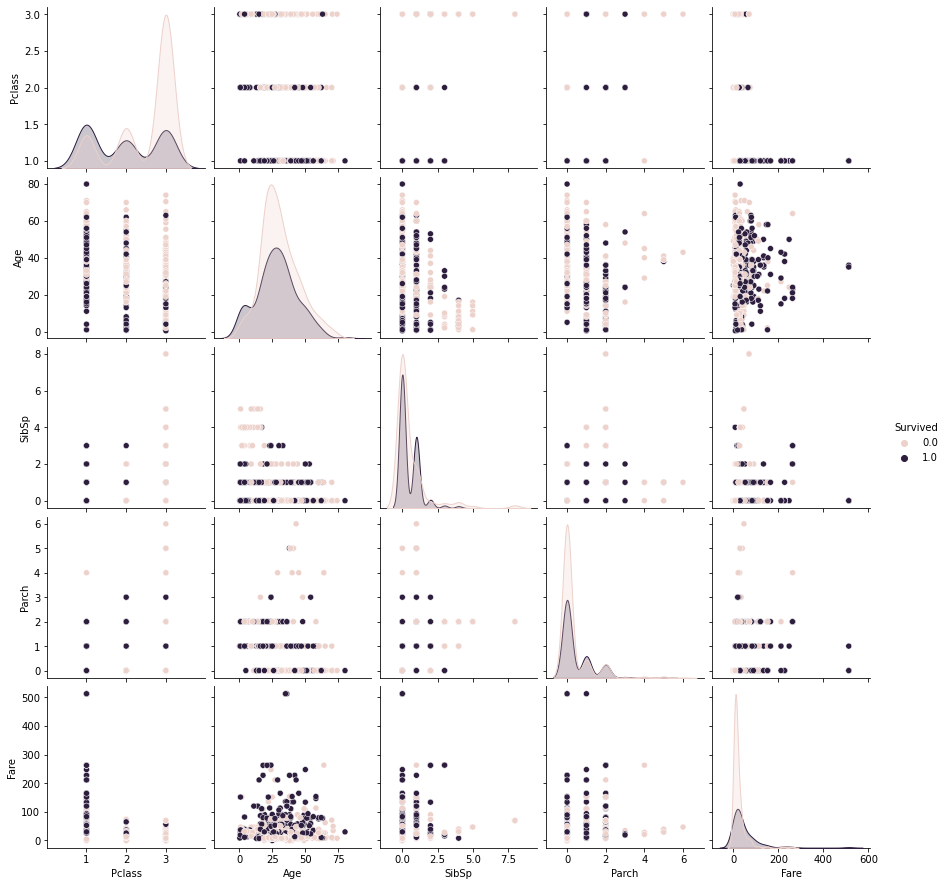

In [6]:
sns.pairplot(df.drop('PassengerId', axis=1), hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

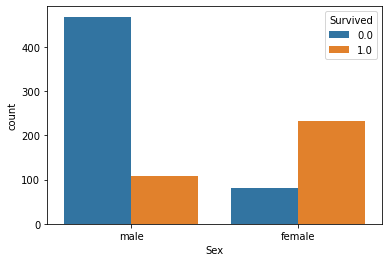

In [7]:
# SEX
sns.countplot(data=df, x ='Sex', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

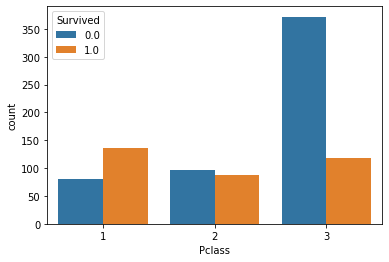

In [8]:
# Pclass
sns.countplot(data=df, x ='Pclass', hue='Survived')

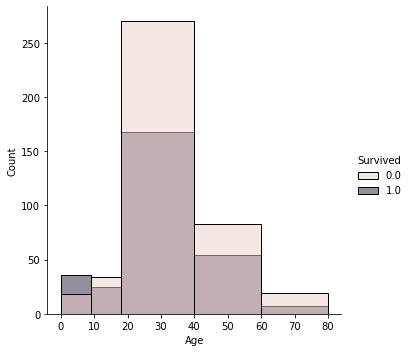

In [9]:
# Age
age_class = [0, 9, 18, 40, 60, 80]
sns.displot(data=df, x='Age', hue='Survived', bins=age_class)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

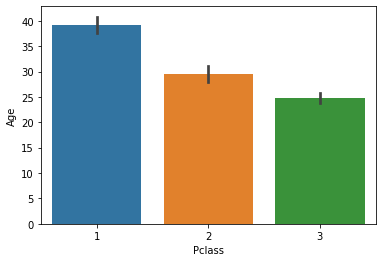

In [10]:
sns.barplot(data=df, x='Pclass', y='Age')

In [11]:
mode_pc1 = (df.loc[df.Pclass == 1]["Age"].mode())[0]

mode_pc2 = (df.loc[df.Pclass == 2]["Age"].mode())[0]

mode_pc3 = (df.loc[df.Pclass == 3]["Age"].mode())[0]

print(mode_pc1, 
      mode_pc2, 
      mode_pc3,
      df.Age.mode().median()
     )

36.0 24.0 22.0 24.0


<AxesSubplot:xlabel='SibSp', ylabel='count'>

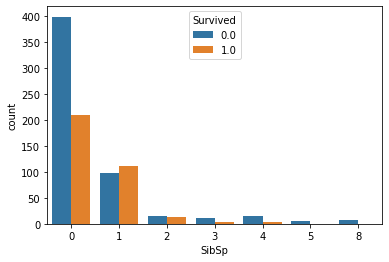

In [12]:
sns.countplot(data=df, x='SibSp', hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

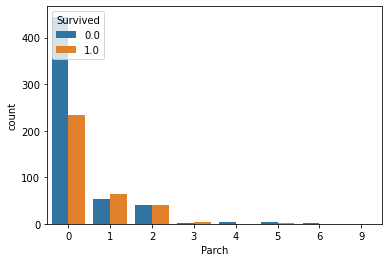

In [13]:
sns.countplot(data=df, x='Parch', hue='Survived')

In [14]:
# Cabin (pode ser melhor essa analise)
pd.crosstab(df.Cabin.apply(lambda x: isinstance(x, str)), df.Survived)

Survived,0.0,1.0
Cabin,,
False,481,206
True,68,136


<AxesSubplot:xlabel='Embarked', ylabel='count'>

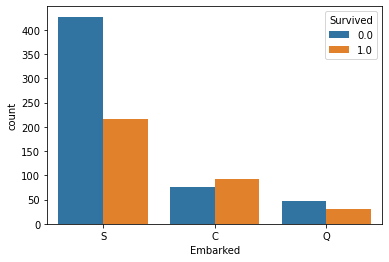

In [15]:
sns.countplot(data=df, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

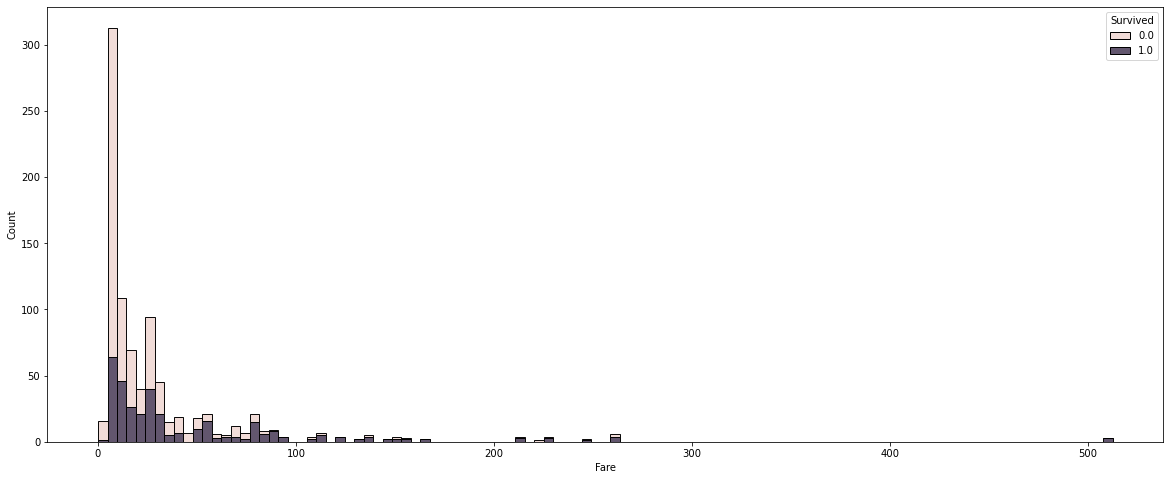

In [16]:
# Fare
plt.figure(figsize=(20,8))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack')

In [17]:
# Imputação de dados faltantes
# Age, Embarked, Cabin
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [18]:
# Age
df.loc[((df.Pclass == 1) & (df.Age.isna())), 'Age'] = mode_pc1
df.loc[((df.Pclass == 2) & (df.Age.isna())), 'Age'] = mode_pc2
df.loc[((df.Pclass == 3) & (df.Age.isna())), 'Age'] = mode_pc3

In [19]:
# Cabin
df.Cabin = df.Cabin.apply(lambda x: 1 if isinstance(x, str) else 0)

In [20]:
# Embarked
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,1,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,1,NaN


In [21]:
pd.crosstab(df.Embarked, df.Survived)

Survived,0.0,1.0
Embarked,,
C,75,93
Q,47,30
S,427,217


In [22]:
df.loc[df.Embarked.isna(), 'Embarked'] = 'C'

In [23]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [24]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [25]:
# PRE PROCESSAMENTO
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [26]:
# Name
df.Name = df.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip() )
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1.0,1,Mrs,female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1.0,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1.0,1,Mrs,female,35.0,1,0,113803,53.1000,1,S
4,5,0.0,3,Mr,male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,Mr,male,22.0,0,0,A.5. 3236,8.0500,0,S
414,1306,NaN,1,Dona,female,39.0,0,0,PC 17758,108.9000,1,C
415,1307,NaN,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,NaN,3,Mr,male,22.0,0,0,359309,8.0500,0,S


<AxesSubplot:xlabel='Name', ylabel='count'>

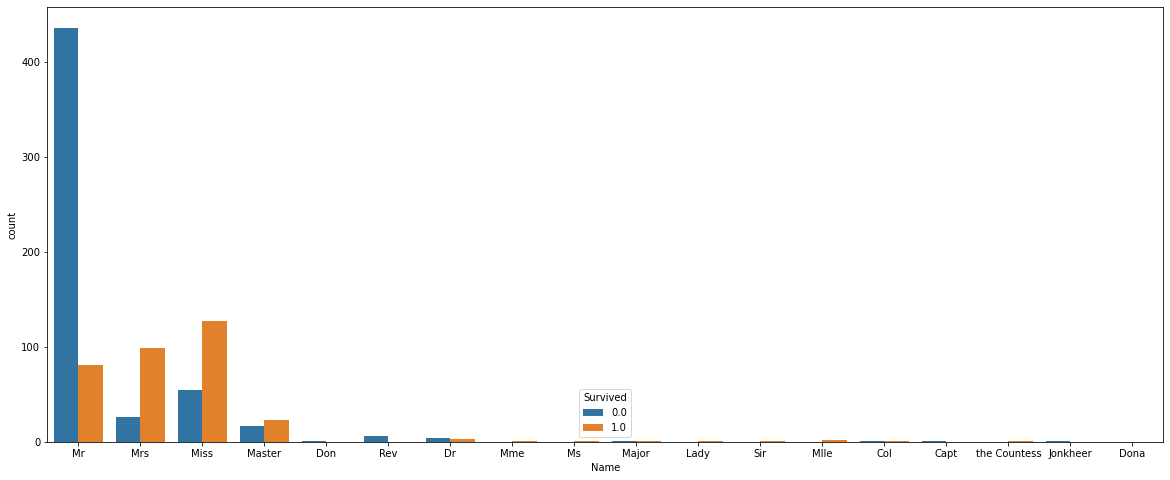

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='Name', hue='Survived')

In [28]:
french_titles = ['Don', 'Dona', 'Mme', 'Ms', 'Mra','Mlle']
english_titles = ['Mr', 'Mrs','Mrs','Mrs','Mrs','Miss']
for i in range(len(french_titles)):
    for j in range(len(english_titles)):
        if i == j:
            df['Name'] = df['Name'].str.replace(french_titles[i],english_titles[j])
            
major_titles = ['Mr','Mrs','Miss','Master'] 
df['Name'] = df['Name'].apply(lambda name: name if name in major_titles else 'Others')


<AxesSubplot:xlabel='Name', ylabel='count'>

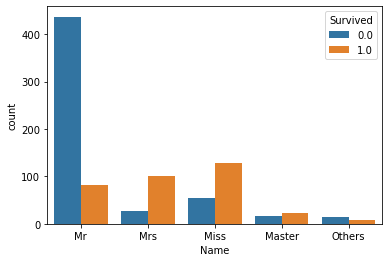

In [29]:
sns.countplot(data=df, x='Name', hue='Survived')

In [30]:
# le = preprocessing.LabelEncoder()
# le.fit(df.Name)
# df.Name = le.transform(df.Name)
# df.Name

categorical_vars = ['Sex', 'Pclass', 'Embarked', 'Name']

df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

In [31]:
# Age Class
# def getAgeClass(age):
#     for i in range(len(age_class)):
#         if(age <= age_class[i]):
#             return i - 1
def getAgeClass(age):
    if age <= 18:
        return 0
    return 1
df['Age_Class'] = df['Age'].apply(lambda age: getAgeClass(age)) # 


<AxesSubplot:xlabel='Age_Class', ylabel='count'>

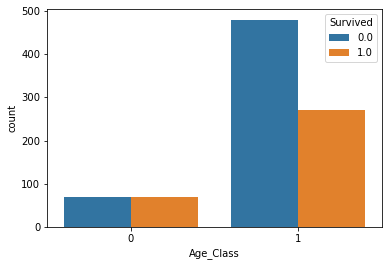

In [32]:
sns.countplot(data=df, x='Age_Class', hue='Survived')

In [33]:
df_test = df[df['Survived'].isnull()].drop(['Survived'],axis=1)
df = df[df['Survived'].notnull()]

In [34]:
X = df.drop(['PassengerId', 'Survived', 'Ticket', 'Age'], 1, inplace=False)
y = df['Survived']

In [35]:
X

,SibSp,Parch,Fare,Cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Name_Miss,Name_Mr,Name_Mrs,Name_Others,Age_Class
0,1,0,7.2500,0,1,0,1,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,0,0,0,0,0,1,0,1
2,0,0,7.9250,0,0,0,1,0,1,1,0,0,0,1
3,1,0,53.1000,1,0,0,0,0,1,0,0,1,0,1
4,0,0,8.0500,0,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,0,1,1,0,0,1,0,0,0,1,1
887,0,0,30.0000,1,0,0,0,0,1,1,0,0,0,1
888,1,2,23.4500,0,0,0,1,0,1,1,0,0,0,1
889,0,0,30.0000,1,1,0,0,0,0,0,1,0,0,1


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
X = pd.DataFrame(X_transformed, columns=list(X.columns.values))
X.head()

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0,1))

# scaler.fit(X)
# X_transformed = scaler.transform(X)
# X = pd.DataFrame(X_transformed, columns=list(X.columns.values))

# X

,SibSp,Parch,Fare,Cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Name_Miss,Name_Mr,Name_Mrs,Name_Others,Age_Class
0,0.432793,-0.473674,-0.502445,-0.544925,0.737695,-0.510152,0.902587,-0.307562,0.619306,-0.510152,0.848574,-0.407714,-0.159111,0.429931
1,0.432793,-0.473674,0.786845,1.835115,-1.355574,-0.510152,-1.107926,-0.307562,-1.614710,-0.510152,-1.178448,2.452702,-0.159111,0.429931
2,-0.474545,-0.473674,-0.488854,-0.544925,-1.355574,-0.510152,0.902587,-0.307562,0.619306,1.960202,-1.178448,-0.407714,-0.159111,0.429931
3,0.432793,-0.473674,0.420730,1.835115,-1.355574,-0.510152,-1.107926,-0.307562,0.619306,-0.510152,-1.178448,2.452702,-0.159111,0.429931
4,-0.474545,-0.473674,-0.486337,-0.544925,0.737695,-0.510152,0.902587,-0.307562,0.619306,-0.510152,0.848574,-0.407714,-0.159111,0.429931


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train,y_test =train_test_split(X, y, test_size=0.2,random_state=101)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid={"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=100)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.82625


In [40]:
# clf = LogisticRegression(random_state = 0).fit(X_train, y_train)

logreg2=LogisticRegression(C=0.1,penalty="l2")
logreg2.fit(X_train,y_train)
prediction = logreg2.predict(X_test)
print("Train",logreg2.score(X_train,y_train))
print("Test",logreg2.score(X_test,y_test))


Train 0.8314606741573034
Test 0.8268156424581006


In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(confusion_matrix(y_test,prediction))

[[91  8]
 [23 57]]


In [43]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85        99
         1.0       0.88      0.71      0.79        80

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.82       179



In [44]:
df_test.head()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Name_Miss,Name_Mr,Name_Mrs,Name_Others,Age_Class
0,892,34.5,0,0,330911,7.8292,0,1,0,1,1,0,0,1,0,0,1
1,893,47.0,1,0,363272,7.0000,0,0,0,1,0,1,0,0,1,0,1
2,894,62.0,0,0,240276,9.6875,0,1,1,0,1,0,0,1,0,0,1
3,895,27.0,0,0,315154,8.6625,0,1,0,1,0,1,0,1,0,0,1
4,896,22.0,1,1,3101298,12.2875,0,0,0,1,0,1,0,0,1,0,1


In [45]:
ids = df_test.PassengerId
X_test2 = df_test.drop(['PassengerId', 'Ticket', 'Age'], 1, inplace=False)

In [46]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X_test2)
X_test2 = pd.DataFrame(X_transformed, columns=list(X_test2.columns.values))
X_test2.head()

,SibSp,Parch,Fare,Cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Name_Miss,Name_Mr,Name_Mrs,Name_Others,Age_Class
0,-0.499470,-0.400248,-0.497413,-0.52753,0.755929,-0.534933,0.957826,2.843757,-1.350676,-0.478969,0.861201,-0.463806,-0.11003,0.385164
1,0.616992,-0.400248,-0.512278,-0.52753,-1.322876,-0.534933,0.957826,-0.351647,0.740370,-0.478969,-1.161169,2.156073,-0.11003,0.385164
2,-0.499470,-0.400248,-0.464100,-0.52753,0.755929,1.869391,-1.044031,2.843757,-1.350676,-0.478969,0.861201,-0.463806,-0.11003,0.385164
3,-0.499470,-0.400248,-0.482475,-0.52753,0.755929,-0.534933,0.957826,-0.351647,0.740370,-0.478969,0.861201,-0.463806,-0.11003,0.385164
4,0.616992,0.619896,-0.417492,-0.52753,-1.322876,-0.534933,0.957826,-0.351647,0.740370,-0.478969,-1.161169,2.156073,-0.11003,0.385164


In [47]:
pred = logreg2.predict(X_test2)
X_test2['Survived'] = pred
X_test2['PassengerId'] = ids
X_test2

,SibSp,Parch,Fare,Cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Name_Miss,Name_Mr,Name_Mrs,Name_Others,Age_Class,Survived,PassengerId
0,-0.499470,-0.400248,-0.497413,-0.527530,0.755929,-0.534933,0.957826,2.843757,-1.350676,-0.478969,0.861201,-0.463806,-0.11003,0.385164,0.0,892
1,0.616992,-0.400248,-0.512278,-0.527530,-1.322876,-0.534933,0.957826,-0.351647,0.740370,-0.478969,-1.161169,2.156073,-0.11003,0.385164,1.0,893
2,-0.499470,-0.400248,-0.464100,-0.527530,0.755929,1.869391,-1.044031,2.843757,-1.350676,-0.478969,0.861201,-0.463806,-0.11003,0.385164,0.0,894
3,-0.499470,-0.400248,-0.482475,-0.527530,0.755929,-0.534933,0.957826,-0.351647,0.740370,-0.478969,0.861201,-0.463806,-0.11003,0.385164,0.0,895
4,0.616992,0.619896,-0.417492,-0.527530,-1.322876,-0.534933,0.957826,-0.351647,0.740370,-0.478969,-1.161169,2.156073,-0.11003,0.385164,0.0,896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.499470,-0.400248,-0.493455,-0.527530,0.755929,-0.534933,0.957826,-0.351647,0.740370,-0.478969,0.861201,-0.463806,-0.11003,0.385164,0.0,1305
414,-0.499470,-0.400248,1.314435,1.895628,-1.322876,-0.534933,-1.044031,-0.351647,-1.350676,-0.478969,-1.161169,2.156073,-0.11003,0.385164,1.0,1306
415,-0.499470,-0.400248,-0.507796,-0.527530,0.755929,-0.534933,0.957826,-0.351647,0.740370,-0.478969,0.861201,-0.463806,-0.11003,0.385164,0.0,1307
416,-0.499470,-0.400248,-0.493455,-0.527530,0.755929,-0.534933,0.957826,-0.351647,0.740370,-0.478969,0.861201,-0.463806,-0.11003,0.385164,0.0,1308


In [65]:
test_to_csv =  X_test2[['PassengerId', 'Survived']]
test_to_csv
# test_to_csv.to_csv('submission.csv')

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [49]:
# Referências

# https://www.kaggle.com/suddharshan/titanic-survival-prediction-eda-top-6/notebook?scriptVersionId=80679457
# https://towardsdatascience.com/kaggles-titanic-competition-in-10-minutes-part-iii-a492a1a1604f